## Emotion Detection 

The following notebook aims to develop a **Machine Learning** model for:

+ Sentiment Analysis
+ Text Classification


### Dataset

https://github.com/lukasgarbas/nlp-text-emotion

In [89]:
#Import required libraries
#EDA libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Text Preprocessing 
import neattext.functions as nfx
from nltk import word_tokenize

# Transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

#Models
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

### Plotting confusion matrix for later evaluation
+ (Source: https://github.com/lukasgarbas/nlp-text-emotion/blob/master/traditional_ml.ipynb)

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
#Load Dataset
df = pd.read_csv('emotion_dataset_2.csv')

/home/kevin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.drop(['Unnamed: 0','Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17', 'Clean_Text'], inplace=True, axis = 1)

In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

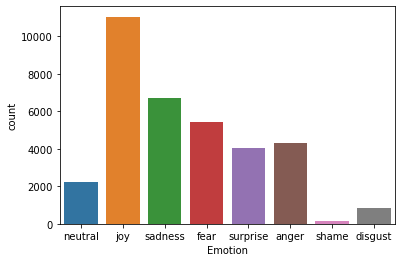

In [7]:
sns.countplot(x = 'Emotion', data=df)

In [8]:
#Drop null values
df.dropna(inplace=True)

In [9]:
#Cleaning Text
df['Cleaned'] = df['Text'].apply(nfx.remove_userhandles)

In [10]:
df['Cleaned'] = df['Cleaned'].apply(nfx.remove_stopwords)
df['Cleaned'] = df['Cleaned'].apply(nfx.remove_punctuations)
df['Cleaned'] = df['Cleaned'].apply(nfx.remove_urls)
df.tail()

,Emotion,Text,Cleaned
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU
34791,sadness,"I think about you baby, and I dream about you ...",think baby dream time


In [11]:
#Set feature and target variables
X = df['Cleaned']
y = df['Emotion']

In [12]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [85]:
#Build a pipeline
# LogisticRegression Pipeline
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [86]:
pipe_lr.fit(X_train,y_train)

/home/kevin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [87]:
#Model Evaluation
y_lr_pred = pipe_lr.predict(X_test)
print('Accuracy: {:.2f}%'.format(pipe_lr.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_lr_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_lr_pred))

Accuracy: 62.07%
F1 Score: 62.07
Confusion Matrix: 
 [[ 668   13   84  252   84  154    0   40]
 [  18   52   20   70   10   46    0   16]
 [  68   10 1041  282   49  134    0   62]
 [  93    7  102 2589  134  276    0  162]
 [   8    0   13   93  494   45    0   10]
 [  97    6  102  511   73 1119    1   94]
 [   1    0    3    5    0    3   32    0]
 [  32    6   54  442   33  140    1  483]]


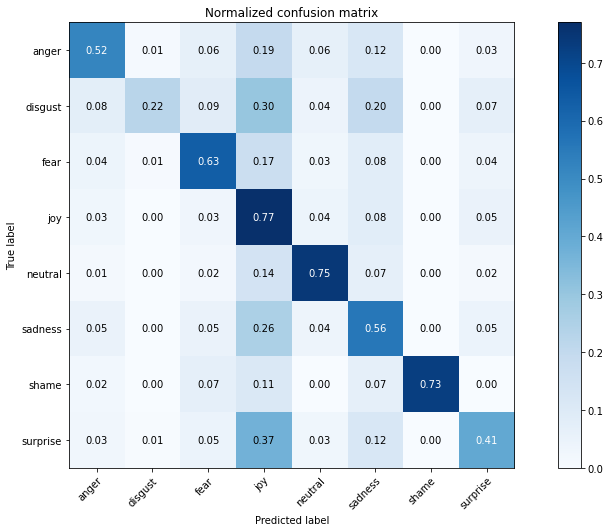

In [88]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_lr_pred, classes=pipe_lr.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### Naive Bayes

In [92]:
# Naive Bayes Pipeline
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultinomialNB())])

In [93]:
pipe_nb.fit(X_train, y_train)
y_nb_pred = pipe_nb.predict(X_test)

In [94]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_nb.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_nb_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_nb_pred))

Accuracy: 56.82%
F1 Score: 56.82
Confusion Matrix: 
 [[ 600    0   72  405    3  202    0   13]
 [  24    5   22  112    1   56    0   12]
 [  59    2  955  414    3  148    0   65]
 [  59    0   87 2938    7  212    0   60]
 [  16    0   19  475   56   89    0    8]
 [  65    1   85  751    1 1069    0   31]
 [  10    0    7   13    0   14    0    0]
 [  34    0   40  667    1  142    0  307]]


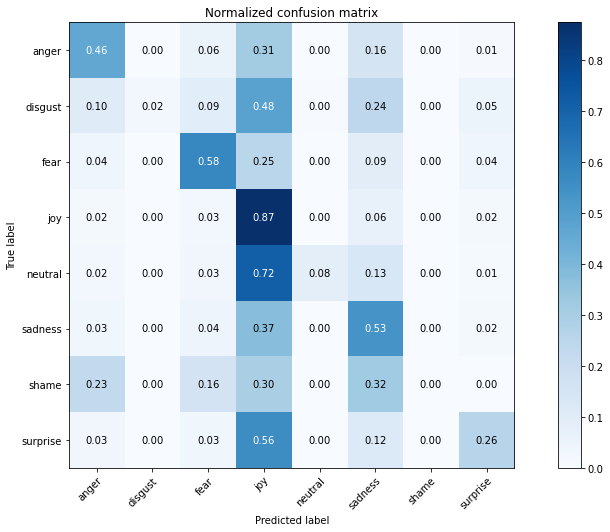

In [95]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_nb_pred, classes=pipe_nb.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### Stochastic Gradient Descent

In [37]:
# SGD Pipeline
pipe_sgd = Pipeline(steps=[('cv',CountVectorizer()),('sgd', SGDClassifier())])

In [38]:
pipe_sgd.fit(X_train, y_train)
y_sgd_pred = pipe_sgd.predict(X_test)

In [39]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_sgd.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_sgd_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_sgd_pred))

Accuracy: 61.81%
F1 Score: 61.81
Confusion Matrix: 
 [[ 667   15  104  233   73  151    0   52]
 [  24   59   21   60   10   38    0   20]
 [  71   17 1066  254   40  133    0   65]
 [ 132   13  131 2558  131  243    0  155]
 [  11    1   16   91  486   46    0   12]
 [ 106   20  103  505   73 1089    1  106]
 [   0    0    0    2    1    2   38    1]
 [  39   17   62  424   35  125    1  488]]


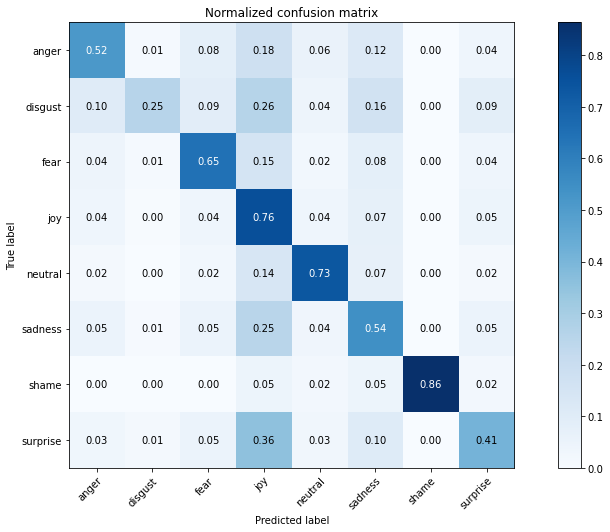

In [40]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_sgd_pred, classes=pipe_sgd.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### K-Nearest Neighbours

In [41]:
# KNN Pipeline
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn', KNeighborsClassifier())])

In [43]:
pipe_knn.fit(X_train, y_train)
y_knn_pred = pipe_knn.predict(X_test)

In [44]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_knn.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_knn_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_knn_pred))

Accuracy: 21.92%
F1 Score: 21.92
Confusion Matrix: 
 [[ 142    0   49   86  979   37    0    2]
 [  10    2   11   28  177    3    0    1]
 [  69   11  388  124 1017   34    0    3]
 [  65    5  136  823 2281   40    0   13]
 [   2    0    3   20  629    9    0    0]
 [  66    3   53  149 1462  267    0    3]
 [   1    0    0    0   43    0    0    0]
 [  42    1   33  145  921   12    0   37]]


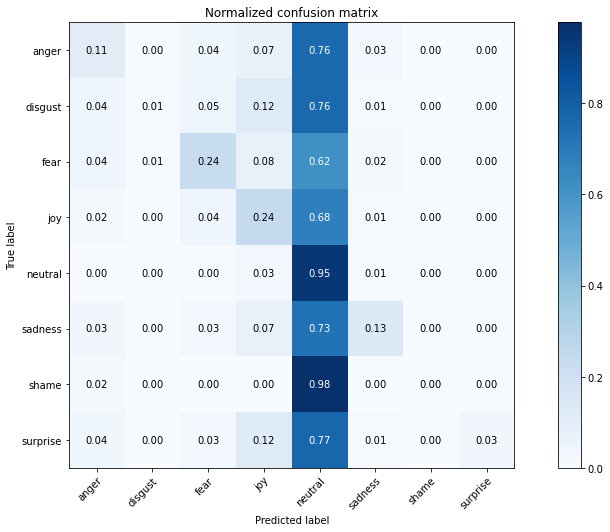

In [59]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_knn_pred, classes=pipe_knn.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### Decision Tree

In [46]:
# Tree Pipeline
pipe_tree = Pipeline(steps=[('cv',CountVectorizer()),('tree', DecisionTreeClassifier())])

In [47]:
pipe_tree.fit(X_train, y_train)
y_tree_pred = pipe_tree.predict(X_test)

In [48]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_tree.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_tree_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_tree_pred))

Accuracy: 52.26%
F1 Score: 52.26
Confusion Matrix: 
 [[ 611   11   75  228  171  150    0   49]
 [  31   33   14   61   36   35    1   21]
 [  92    9  968  240  162  112    0   63]
 [ 162   14  161 1999  535  290    0  202]
 [  15    4   17   63  516   35    1   12]
 [ 137   16  101  445  304  896    2  102]
 [   0    0    0    1    1    1   41    0]
 [  64   12   66  346  190  122    1  390]]


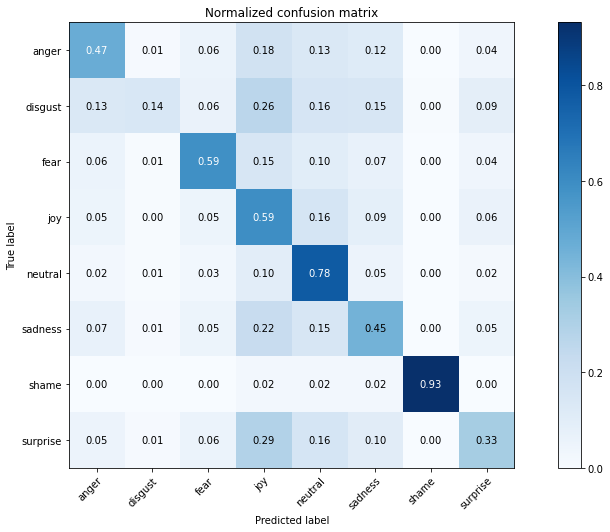

In [49]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_tree_pred, classes=pipe_tree.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### Random Forest

In [76]:
# Random Forest Pipeline
pipe_for = Pipeline(steps=[('cv',CountVectorizer()),('for', RandomForestClassifier())])

In [77]:
pipe_for.fit(X_train, y_train)
y_for_pred = pipe_for.predict(X_test)

In [78]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_for.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_for_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_for_pred))

Accuracy: 56.98%
F1 Score: 56.98
Confusion Matrix: 
 [[ 607    3   47  256  186  183    0   13]
 [  19   27   16   77   50   37    1    5]
 [  60    3  989  279  163  121    0   31]
 [  89    1   89 2420  497  207    0   60]
 [  10    0   11   62  542   35    0    3]
 [  94    4   65  517  330  966    1   26]
 [   1    0    0    1    2    3   37    0]
 [  37    1   46  442  206   99    1  359]]


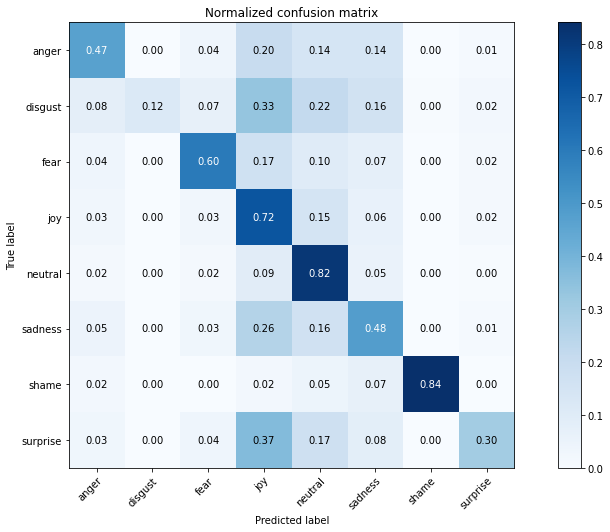

In [79]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_for_pred, classes=pipe_for.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### Support Vector Machine

In [68]:
# SVM Pipeline
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm', SVC(tol=1e-05))])

In [69]:
pipe_svm.fit(X_train, y_train)
y_svm_pred = pipe_svm.predict(X_test)

In [70]:
#Model Evaluation
print('Accuracy: {:.2f}%'.format(pipe_svm.score(X_test, y_test)*100))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_svm_pred, average='micro') * 100))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_svm_pred))

Accuracy: 61.09%
F1 Score: 61.09
Confusion Matrix: 
 [[ 547    0   38  459   66  168    0   17]
 [  16    9    9  144    2   48    0    4]
 [  46    0  954  474   23  125    0   24]
 [  48    0   36 2964   93  153    0   69]
 [   2    0    7  129  488   36    0    1]
 [  50    0   49  785   51 1035    0   33]
 [   0    0    1   16    0    3   24    0]
 [  19    0   29  668   14  105    1  355]]


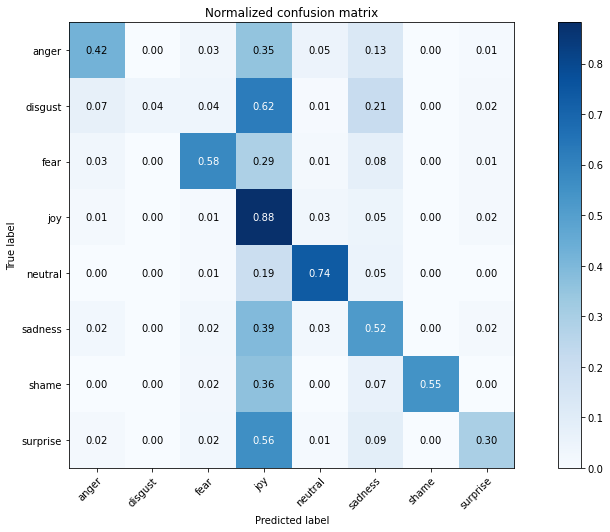

In [71]:
##Plot Confusion Matrix
plot_confusion_matrix(y_test, y_svm_pred, classes=pipe_svm.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

### Model Comparison

In [99]:
com = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Descent', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forest', 'Support Vector Machine'],
                                     'Accuracy': ['62.07%', '56.82%', '61.81%', '21.92%', '52.26%', '56.98%', '61.09%'],
                                     'F1 Score':  [62.07, 56.82, 61.81, 21.92, 52.26, 56.98, 61.09] })
com.sort_values(by=['F1 Score'], ascending= False)

,Model,Accuracy,F1 Score
0,Logistic Regression,62.07%,62.07
2,Stochastic Gradient Descent,61.81%,61.81
6,Support Vector Machine,61.09%,61.09
5,Random Forest,56.98%,56.98
1,Naive Bayes,56.82%,56.82
4,Decision Tree,52.26%,52.26
3,K-Nearest Neighbours,21.92%,21.92


### Save Model

In [104]:
# Save Model & Pipeline
import pickle
pickle.dump(pipe_lr, open('emo_cls.pkl', 'wb'))

In [128]:
#Test
model = pickle.load(open("emo_cls.pkl", 'rb'))

message = "That was amazing"  
model.predict([message])

array(['surprise'], dtype=object)